In [120]:
import numpy as np
import pandas as pd
import json
import heapq
import pprint as pp
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score
import matplotlib
import matplotlib.pyplot as plt
#from models import linearRegression
#from util import vis

In [121]:
PATH = "data/data/mpd.slice.96000-96999.json"

with open(PATH) as f:
    data = json.load(f)
    playlists = data["playlists"]
    #pp.pprint(playlists[0])
data = pd.DataFrame(playlists)
print(len(data))

1000


In [122]:
import glob
path ="data/data" # use your path
allFiles = glob.glob(path + "/*.json")

data = []
nums = [i for i in range(1,11)]
for i,file_ in enumerate(allFiles[:50]):
    with open(file_) as f:
        df = json.load(f)
        data = data + df['playlists']

In [124]:
artists = {}
for playlist in data: 
    for tracks in playlist['tracks']: 
        for track in tracks: 
            artist = track['artist_name']
            if artist not in artists: 
                artists[artist] = 0
            artists[artist] += 1

TypeError: string indices must be integers

In [51]:
biggestArtists = heapq.nlargest(20, artists, key=artists.get)
totalTracks = [artists[artist] for artist in biggestArtists]

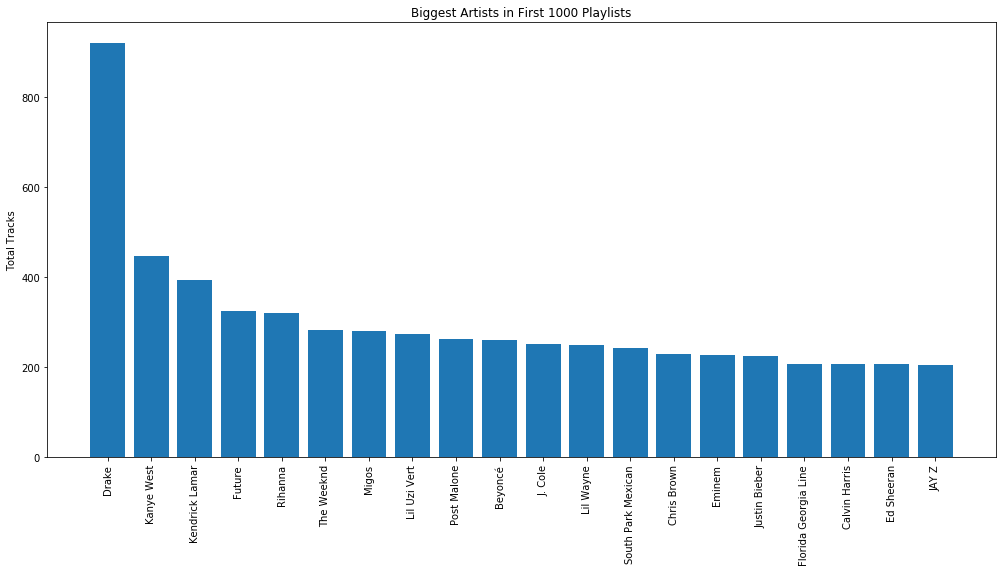

In [61]:
plt.figure(figsize=(17,8))
plt.bar(biggestArtists, totalTracks)

plt.title("Biggest Artists in First 1000 Playlists")
plt.ylabel("Total Tracks")
plt.xticks(rotation='vertical')

plt.show()

In [62]:
playlistLength = [len(tracks) for tracks in data['tracks']]

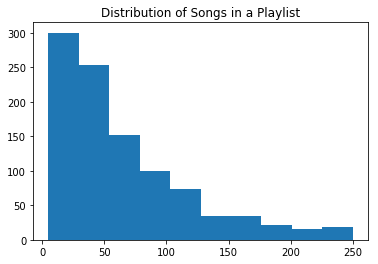

In [65]:
plt.hist(playlistLength)

plt.title("Distribution of Songs in a Playlist")

plt.show()

In [68]:
wordsInTitle = {}


for tracks in data['name']: 
    name = tracks.split(" ")
    for s in name: 
        if s.lower() not in wordsInTitle: 
            wordsInTitle[s.lower()] = 0
        wordsInTitle[s.lower()] += 1

In [70]:
mostCommonNames = heapq.nlargest(20, wordsInTitle, key=wordsInTitle.get)
totalOccurences = [wordsInTitle[word] for word in mostCommonNames]

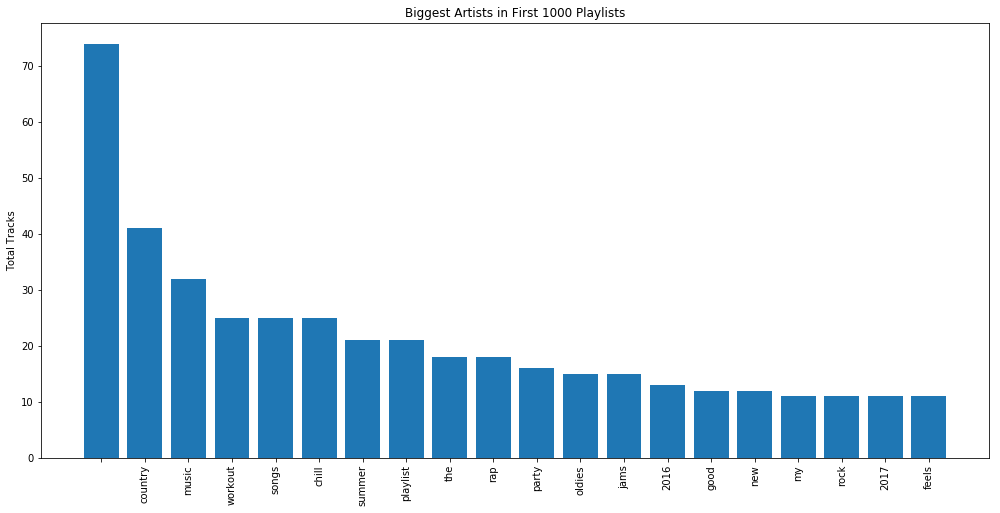

In [71]:
plt.figure(figsize=(17,8))
plt.bar(mostCommonNames, totalOccurences)

plt.title("Biggest Artists in First 1000 Playlists")
plt.ylabel("Total Tracks")
plt.xticks(rotation='vertical')

plt.show()